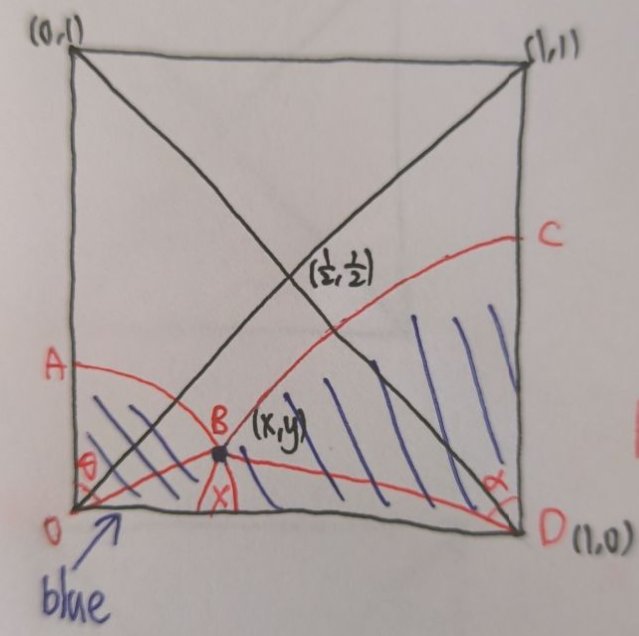

In [5]:
from sympy import symbols, pi, integrate, sqrt, acos

# Define variables
x, y = symbols('x y')

# Define the expression inside the integral
expression = 8 *( pi * (x**2 + y**2) /4 + pi *((1-x)**2+  y**2)/4 + y
                 - (x**2 + y**2) *acos(x / sqrt(x**2 + y**2))
                 - ((1-x)**2+y**2) *acos((1-x)/sqrt((1-x)**2+y**2))
                )

# Compute the integral
integrated_expr = integrate(expression, (y, 0, x), (x, 0, 0.5))
integrated_expr


0.0416666666666667*log(2) + 0.069827364616253 + 0.125*pi

In [6]:
float(integrated_expr)

0.49140757883830816

In [4]:
# Monte Carlo way to verify the result
import random
import numpy as np


def perpendicular_intersection_with_bottom(blue, red):
    # Points
    blue = np.array(blue)
    red = np.array(red)
    
    # Midpoint
    midpoint = (blue + red) / 2
    
    # Slope of the line between blue and red
    if (red[0] - blue[0]) == 0:
        return False
    else:
        slope = (red[1] - blue[1]) / (red[0] - blue[0])
    
    if slope == 0:
        return True
    else:
        perp_slope = -1 / slope
    
    # Equation of the perpendicular bisector
    # y - y1 = m * (x - x1)
    # Solve for x when y = 0 
    intercept = midpoint[0] - (midpoint[1]/perp_slope)
    
    return True if 0<=intercept<=1 else False

# begin
total = 10000000
count = 0

for i in range(total):
    blue = (random.random(), random.random())
    red = (random.random(), random.random())
    # choose the edge
    # distance: left, top, right, bottom
    distance = [blue[0], 1-blue[1], 1-blue[0], blue[1]]
    minimum = distance.index(min(distance))

    if minimum == 3:  # bottom edge
        if perpendicular_intersection_with_bottom(blue, red):
            count += 1
count*4/total

0.4909504